In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('sp500sub.csv', index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [12]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

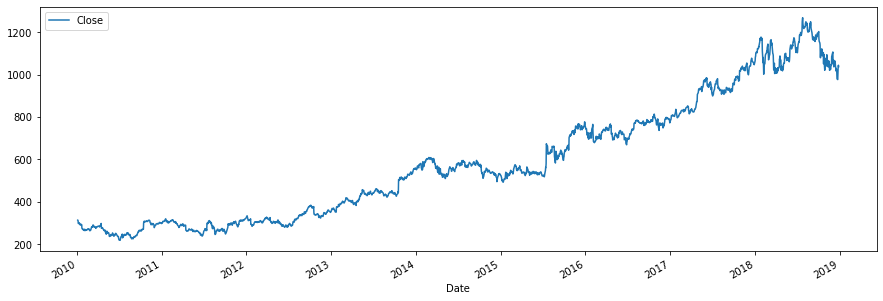

In [13]:
goog.plot(figsize=(15,5));

In [14]:
goog['LogClose'] = np.log(goog['Close'])

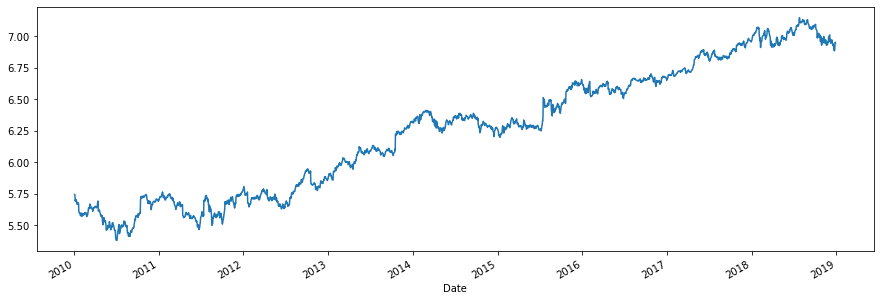

In [15]:
goog['LogClose'].plot(figsize=(15,5))

In [20]:
Ntest = 30
train = goog.iloc[:-Ntest]
test = goog.iloc[-Ntest:]

In [21]:
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [22]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [23]:
hw = ExponentialSmoothing(
    train['LogClose'],
    initialization_method='legacy-heuristic',
    trend='add', seasonal=None
)
res_hw = hw.fit()

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
goog.loc[train_idx, 'HoltWintersTrain'] = res_hw.fittedvalues

In [25]:
goog.loc[test_idx, 'HoltWintersTest'] = res_hw.forecast(Ntest).to_numpy()

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


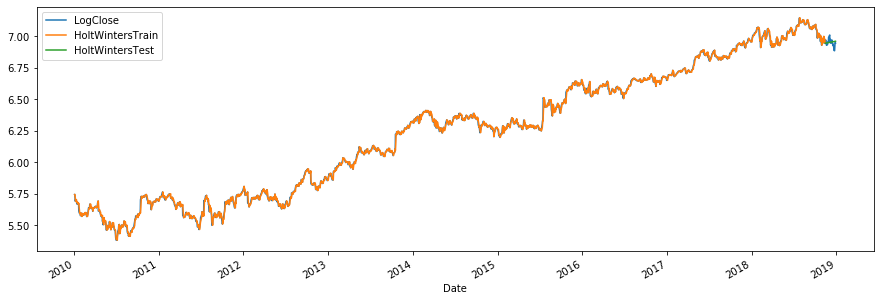

In [26]:
goog[['LogClose','HoltWintersTrain','HoltWintersTest']].plot(figsize=(15,5));

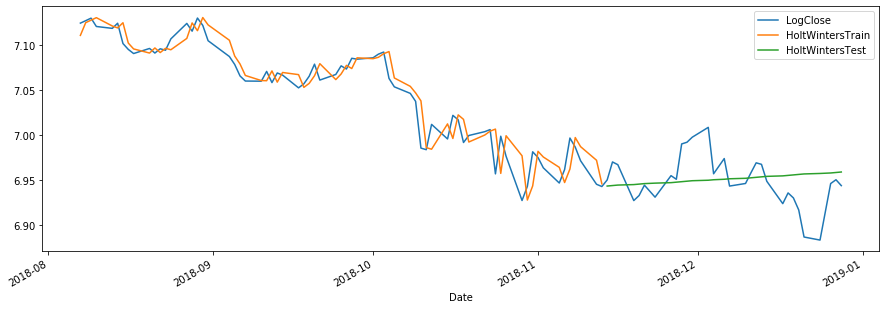

In [27]:
cols = ['LogClose','HoltWintersTrain','HoltWintersTest']
goog.iloc[-100:][cols].plot(figsize=(15,5));

In [29]:
from sklearn.metrics import r2_score

In [30]:
train_score = r2_score(train['LogClose'], res_hw.fittedvalues)

In [31]:
train_score

0.9990418372244649

In [32]:
test_score = r2_score(test['LogClose'], res_hw.forecast(Ntest))

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [34]:
test_score

-0.15876524401310088

In [35]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [36]:
mean_absolute_percentage_error(train['LogClose'], res_hw.fittedvalues)

0.001677293337936154

In [37]:
mean_absolute_percentage_error(test['LogClose'], res_hw.forecast(Ntest))

/Users/maria/opt/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


0.0032882647950714223

In [48]:
# Naive Forecast
goog['LogClosePrediction'] = goog['LogClose'].shift(Ntest)

In [49]:
goog

,Close,LogClose,HoltWintersTrain,HoltWintersTest,LogClosePrediction
Date,,,,,
2010-01-04,312.204773,5.743659,5.743659,NaN,NaN
2010-01-05,310.829926,5.739246,5.744197,NaN,NaN
2010-01-06,302.994293,5.713714,5.739783,NaN,NaN
2010-01-07,295.940735,5.690159,5.714251,NaN,NaN
2010-01-08,299.885956,5.703402,5.690697,NaN,NaN
...,...,...,...,...,...
2018-12-21,979.539978,6.887083,NaN,6.957143,6.997038
2018-12-24,976.219971,6.883688,NaN,6.957681,6.986936
2018-12-26,1039.459961,6.946457,NaN,6.958218,6.971809


In [50]:
r2_score(goog['LogClose'][Ntest:], goog['LogClosePrediction'][Ntest:])

0.974657481395984

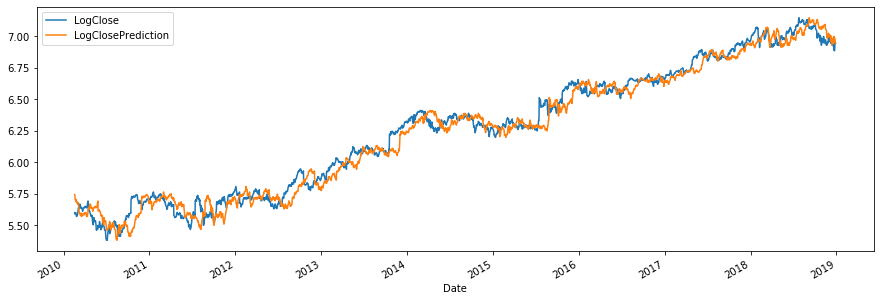

In [51]:
goog[['LogClose','LogClosePrediction']][Ntest:].plot(figsize=(15,5));

In [52]:
mean_absolute_percentage_error(goog['LogClose'][Ntest:], goog['LogClosePrediction'][Ntest:])

0.01010259994528233